[![Labellerr](https://storage.googleapis.com/labellerr-cdn/%200%20Labellerr%20template/notebook.webp)](https://www.labellerr.com)

# **Different Blood Cell Type Counting**

---

[![labellerr](https://img.shields.io/badge/Labellerr-BLOG-black.svg)](https://www.labellerr.com/blog/<BLOG_NAME>)
[![Youtube](https://img.shields.io/badge/Labellerr-YouTube-b31b1b.svg)](https://www.youtube.com/@Labellerr)
[![Github](https://img.shields.io/badge/Labellerr-GitHub-green.svg)](https://github.com/Labellerr/Hands-On-Learning-in-Computer-Vision)

## Annotate your Custom dataset using Labellerr

 ***1. Visit the [Labellerr](https://www.labellerr.com/?utm_source=githubY&utm_medium=social&utm_campaign=github_clicks) website and click **“Sign Up”**.*** 

 ***2. After signing in, create your workspace by entering a unique name.***

 ***3. Navigate to your workspace’s API keys page (e.g., `https://<your-workspace>.labellerr.com/workspace/api-keys`) to generate your **API Key** and **API Secret**.***

 ***4. Store the credentials securely, and then use them to initialise the SDK or API client with `api_key`, `api_secret`.*** 


### Use Labellerr SDK for uploading and perform annotation of your own dataset

In [ ]:
# uncomment the following lines to install required packages in a Jupyter notebook environment

# !pip install git+https://github.com/Labellerr/SDKPython.git
# !pip install ipyfilechooser
# !git clone https://github.com/Labellerr/yolo_finetune_utils.git

In [ ]:
# all the imports required for this notebook
from labellerr.client import LabellerrClient
from labellerr.core.datasets import create_dataset_from_local
from labellerr.core.annotation_templates import create_template
from labellerr.core.projects import create_project
from labellerr.core.schemas import DatasetConfig, AnnotationQuestion, QuestionType, CreateTemplateParams, DatasetDataType, CreateProjectParams, RotationConfig
from labellerr.core.projects import LabellerrProject
from labellerr.core.exceptions import LabellerrError

import uuid
from ipyfilechooser import FileChooser

In [ ]:
api_key = input("YOUR_API_KEY")        # go to labellerr workspace to get your API key
api_secret = input("YOUR_API_SECRET")  # go to labellerr workspace to get your API secret
client_id = input("YOUR_CLIENT_ID")   # Contact labellerr support to get your client ID i.e. support@tensormatics.com

client = LabellerrClient(api_key, api_secret, client_id)


### ***STEP-1: Create a dataset on labellerr from your local folder***

The SDK supports in creating dataset by uploading local files. 

In [ ]:
# Create a folder chooser starting from a directory (for example, your home directory)
chooser = FileChooser('/')

# Set the chooser to folder selection mode only
chooser.title = 'Select a folder containing your dataset'
chooser.show_only_dirs = True

# Display the widget
display(chooser)

FileChooser(path='D:\', filename='', title='Select a folder containing your dataset', show_hidden=False, selec…

In [ ]:
path_to_dataset = chooser.selected_path
print("You selected:", path_to_dataset)

You selected: D:\Professional\Projects\Cell_Segmentation_using_YOLO\frames_output


In [ ]:
my_dataset_type = input("Enter your dataset type (video or image): ").lower()
print("Selected dataset type:", my_dataset_type)

Selected dataset type: video


In [ ]:
dataset = create_dataset_from_local(
    client=client,
    dataset_config=DatasetConfig(dataset_name="My Dataset", data_type="image"),
    folder_to_upload=path_to_dataset
)

print(f"Dataset created with ID: {dataset.dataset_id}")


### ***STEP-2: Create annotation project on labellerr of your created dataset***

Create a annotation project of your uploaded dataset to start performing annotation on labellerr UI

In [ ]:
# Create annotation guideline template for video annotation project (like classes to be annotated)

template = create_template(
    client=client,
    params=CreateTemplateParams(
        template_name="My Template",
        data_type=DatasetDataType.image,
        questions=[
            AnnotationQuestion(
                question_number=1,
                question="Object",
                question_id=str(uuid.uuid4()),
                question_type=QuestionType.polygon,
                required=True,
                color="#FF0000"
            )
        ]
    )
)
print(f"Annotation template created with ID: {template.annotation_template_id}")


In [ ]:
dataset.status()        # wait until dataset is processed before creating project

project = create_project(
    client=client,
    params=CreateProjectParams(
        project_name="My Project",
        data_type=DatasetDataType.image,
        rotations=RotationConfig(
            annotation_rotation_count=1,
            review_rotation_count=1,
            client_review_rotation_count=1
        )
    ),
    datasets=[dataset],
    annotation_template=template
)

print(f"✓ Project created: {project.project_id}")

Your project has been created now go to labellerr platform to perform annotation 

***click to go to labellerr.com***

[![Labellerr](https://cdn.labellerr.com/1%20%20Documentation/1c9dc7ce-9a54-4111-8fd5-0363ba3e00e1.webp)](https://www.labellerr.com/?utm_source=githubY&utm_medium=social&utm_campaign=github_clicks)
Open the project you created (Projects → select your project).

Click Start Labeling to open the annotation interface. Use the configured labeling tools (bounding boxes, polygon, dot, classification, etc.) to annotate files.
### ***STEP-3: Export your annotation in required format***

Generate a temporary download URL to retrieve your exported JSON file:

### Export Configuration Parameters

| Parameter | Type | Description |
|-----------|------|-------------|
| `export_name` | string | Display name for the export |
| `export_description` | string | Description of what this export contains |
| `export_format` | string | Output format (e.g., `json`, `xml`, `coco`) |
| `statuses` | list | Annotation statuses to include in export |

### Common Annotation Statuses

- **`review`**: Annotations pending review
- **`r_assigned`**: Review assigned to a reviewer
- **`client_review`**: Under client review
- **`cr_assigned`**: Client review assigned
- **`accepted`**: Annotations accepted and finalized

---

In [ ]:
export_config = {
    "export_name": "Weekly Export",
    "export_description": "Export of all accepted annotations",
    "export_format": "coco_json",
    "statuses": ['review', 'r_assigned','client_review', 'cr_assigned','accepted']
}

try:
    # Get project instance
    project = LabellerrProject(client=client, project_id=project.project_id)
    
    # Create export
    result = project.create_local_export(export_config)
    export_id = result["response"]['report_id']
    print(f"Local export created successfully. Export ID: {export_id}")
except LabellerrError as e:
    print(f"Local export creation failed: {str(e)}")
    
    
try:
    download_url = client.fetch_download_url(
        project_id=project.project_id,
        uuid=str(uuid.uuid4()),
        export_id=export_id
    )
    print(f"Download URL: {download_url}")
except LabellerrError as e:
    print(f"Failed to fetch download URL: {str(e)}")


Now you can download your annotations locally using given URL

## Convert COCO Annotations to YOLO Format
Transform the COCO JSON annotation format to YOLO format and organize the dataset for training with proper directory structure.

In [ ]:
from yolo_finetune_utils.coco_yolo_converter.seg_converter import coco_to_yolo_converter

ANNOTATION_JSON = r"annotations.json"
IMAGE_DIR = r"img_dataset"


coco_to_yolo_converter(
        json_path=ANNOTATION_JSON,
        images_dir=IMAGE_DIR,
        output_dir="yolo_dataset",
        use_split=False,
        train_ratio=1,
        val_ratio=0.0,
        test_ratio=0.0,
        shuffle=True,
        verbose=False
    )

## GPU Memory Management
Clear GPU cache and monitor memory allocation to ensure sufficient VRAM for model training.

In [10]:
import torch
torch.cuda.empty_cache()

# Check GPU memory status
print(f"Allocated: {torch.cuda.memory_allocated(0)/1024**3:.2f} GB")
print(f"Cached: {torch.cuda.memory_reserved(0)/1024**3:.2f} GB")
print(f"Free: {torch.cuda.mem_get_info(0)[0]/1024**3:.2f} GB")

Allocated: 0.03 GB
Cached: 0.04 GB
Free: 6.72 GB


## Train YOLO Segmentation Model
Fine-tune the YOLOv11m segmentation model on the blood cell dataset for 300 epochs with GPU acceleration.

In [ ]:
from ultralytics import YOLO
# Load a model
model = YOLO("yolo11m-seg.pt")

# Train the model
results = model.train(
    data=r"yolo_dataset\data.yaml",    # Path to your dataset YAML file
    epochs=300,                        # Number of training epochs
    imgsz=640,                         # Image size
    batch=-1,                          # Batch size
    device=0,                          # GPU device (0 for first GPU, 'cpu' for CPU)
    workers=4                         # Number of dataloader workers
)

## Load Best Trained Model
Set the path to the best model weights from the training run for inference.

In [ ]:
MODEL_PATH = r"runs\segment\train\weights\best.pt"

## Define Inference Function
Create a function to perform segmentation inference on images, draw bounding boxes, and display class counts with color-coded labels.

In [11]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

# Define 5 distinct colors (BGR format)
CLASS_COLORS = [
    (0, 0, 255),      # Red
    (0, 255, 0),      # Green
    (255, 0, 255),    # Magenta
    (255, 255, 0),    # Cyan
    (255, 0, 0),      # Blue   
]

def inference_yolo_segmentation(model_path, image_path, conf_threshold=0.25):
    """
    Perform inference on YOLO segmentation model
    
    Args:
        model_path: Path to trained YOLO model (.pt file)
        image_path: Path to input image
        conf_threshold: Confidence threshold for detections
    
    Returns:
        annotated_image: Image with bounding boxes and class counts (RGB format)
    """
    # Load model and image
    model = YOLO(model_path)
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Could not read image from {image_path}")
    
    h, w = image.shape[:2]
    class_names = model.names
    annotated_image = image.copy()
    
    # Run inference
    results = model(image, conf=conf_threshold, verbose=False)[0]
    
    # Track class counts
    class_counts = Counter()
    
    # Process detections
    if results.boxes is not None:
        for box in results.boxes:
            class_id = int(box.cls[0])
            class_counts[class_id] += 1
            
            # Get bounding box coordinates
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
            
            # Draw thin bounding box (thickness=1)
            cv2.rectangle(annotated_image, (x1, y1), (x2, y2), 
                         CLASS_COLORS[class_id], thickness=1)
    
    # Add class counts in upper right with contrast background
    if class_counts:
        y_offset = 25
        x_start = w - 130
        
        # Add text for each class with darker semi-transparent background
        for class_id in sorted(class_counts.keys()):
            text = f"{class_names[class_id]}: {class_counts[class_id]}"
            
            # Get text size for background rectangle
            (text_width, text_height), baseline = cv2.getTextSize(
                text, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)
            
            # Draw darker semi-transparent white background behind text
            overlay = annotated_image.copy()
            cv2.rectangle(overlay, 
                         (x_start - 5, y_offset - text_height - 5),
                         (x_start + text_width + 5, y_offset + baseline + 5),
                         (255, 255, 255), -1)
            annotated_image = cv2.addWeighted(overlay, 0.6, annotated_image, 0.4, 0)
            
            # Draw text on top
            cv2.putText(annotated_image, text, (x_start, y_offset), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.7, CLASS_COLORS[class_id], 2)
            y_offset += 35
    
    # Convert BGR to RGB for matplotlib
    return cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

## Test Inference on Sample Image 1
Run segmentation inference on the first sample blood cell image and visualize the results with detected cells and counts.

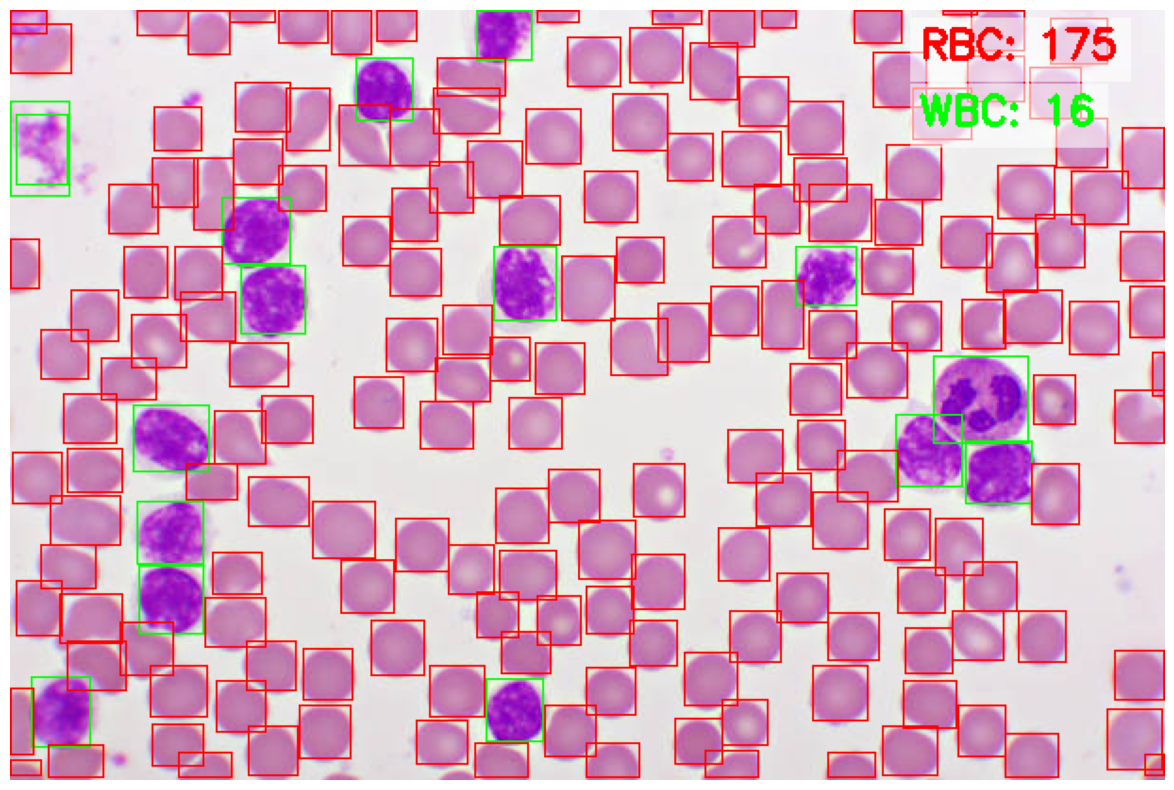

In [12]:
IMAGE_PATH = r'img_dataset\sample-1.jpg'

# Run inference
result_image = inference_yolo_segmentation(MODEL_PATH, IMAGE_PATH, conf_threshold=0.30)

# Plot with matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(result_image)
plt.axis('off')
plt.tight_layout()
plt.show()

## Test Inference on Sample Image 2
Run segmentation inference on the second sample blood cell image and display the annotated results.

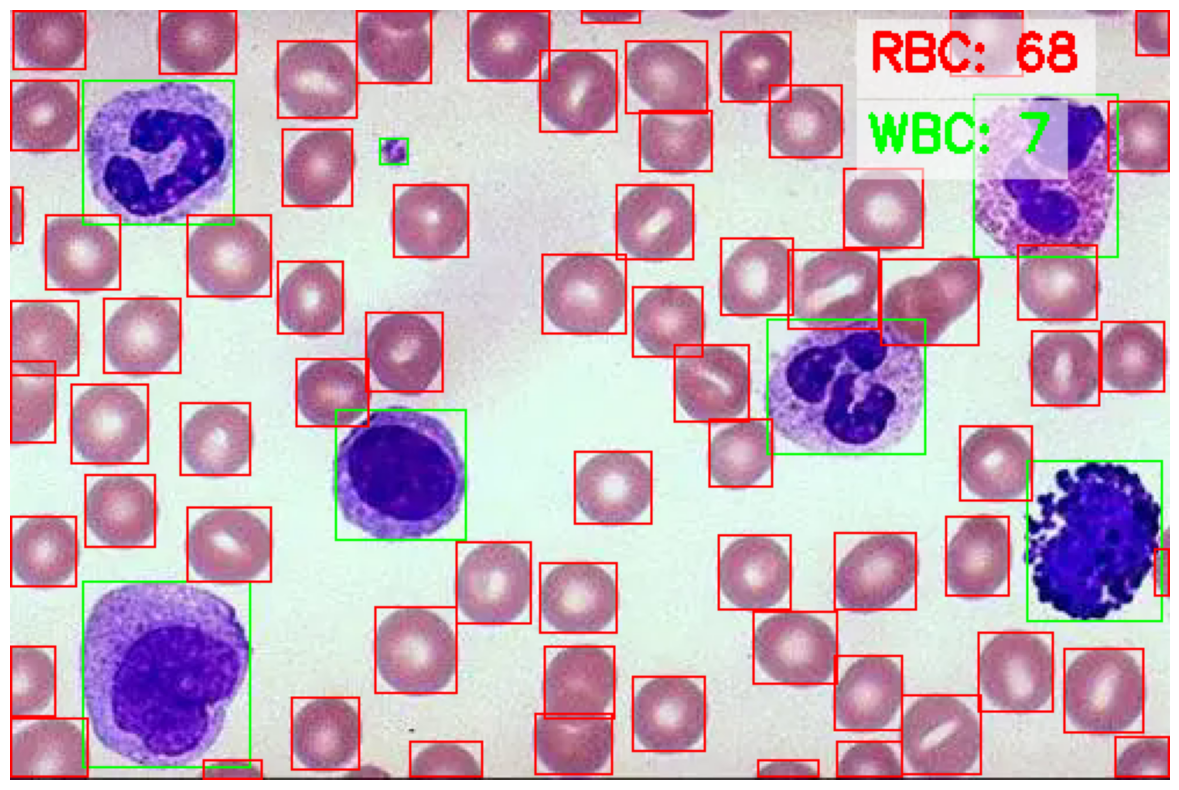

In [13]:
IMAGE_PATH = r'img_dataset\sample-2.png'

# Run inference
result_image = inference_yolo_segmentation(MODEL_PATH, IMAGE_PATH, conf_threshold=0.25)

# Plot with matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(result_image)
plt.axis('off')
plt.tight_layout()
plt.show()

---

## 👨‍💻 About Labellerr's Hands-On Learning in Computer Vision

Thank you for exploring this **Labellerr Hands-On Computer Vision Cookbook**! We hope this notebook helped you learn, prototype, and accelerate your vision projects.  
Labellerr provides ready-to-run Jupyter/Colab notebooks for the latest models and real-world use cases in computer vision, AI agents, and data annotation.

---
## 🧑‍🔬 Check Our Popular Youtube Videos

Whether you're a beginner or a practitioner, our hands-on training videos are perfect for learning custom model building, computer vision techniques, and applied AI:

- [How to Fine-Tune YOLO on Custom Dataset](https://www.youtube.com/watch?v=pBLWOe01QXU)  
  Step-by-step guide to fine-tuning YOLO for real-world use—environment setup, annotation, training, validation, and inference.
- [Build a Real-Time Intrusion Detection System with YOLO](https://www.youtube.com/watch?v=kwQeokYDVcE)  
  Create an AI-powered system to detect intruders in real time using YOLO and computer vision.
- [Finding Athlete Speed Using YOLO](https://www.youtube.com/watch?v=txW0CQe_pw0)  
  Estimate real-time speed of athletes for sports analytics.
- [Object Counting Using AI](https://www.youtube.com/watch?v=smsjBBQcIUQ)  
  Learn dataset curation, annotation, and training for robust object counting AI applications.
---

## 🎦 Popular Labellerr YouTube Videos

Level up your skills and see video walkthroughs of these tools and notebooks on the  
[Labellerr YouTube Channel](https://www.youtube.com/@Labellerr/videos):

- [How I Fixed My Biggest Annotation Nightmare with Labellerr](https://www.youtube.com/watch?v=hlcFdiuz_HI) – Solving complex annotation for ML engineers.
- [Explore Your Dataset with Labellerr's AI](https://www.youtube.com/watch?v=LdbRXYWVyN0) – Auto-tagging, object counting, image descriptions, and dataset exploration.
- [Boost AI Image Annotation 10X with Labellerr's CLIP Mode](https://www.youtube.com/watch?v=pY_o4EvYMz8) – Refine annotations with precision using CLIP mode.
- [Boost Data Annotation Accuracy and Efficiency with Active Learning](https://www.youtube.com/watch?v=lAYu-ewIhTE) – Speed up your annotation workflow using Active Learning.

> 👉 **Subscribe** for Labellerr's deep learning, annotation, and AI tutorials, or watch videos directly alongside notebooks!

---

## 🤝 Stay Connected

- **Website:** [https://www.labellerr.com/](https://www.labellerr.com/)
- **Blog:** [https://www.labellerr.com/blog/](https://www.labellerr.com/blog/)
- **GitHub:** [Labellerr/Hands-On-Learning-in-Computer-Vision](https://github.com/Labellerr/Hands-On-Learning-in-Computer-Vision)
- **LinkedIn:** [Labellerr](https://in.linkedin.com/company/labellerr)
- **Twitter/X:** [@Labellerr1](https://x.com/Labellerr1)

*Happy learning and building with Labellerr!*
